## Observations and Insights 

Analysis: Remicane and Capomulin seem to be the most effective drugs. There seems to be an good balance between male female mice being measured. Tumor volume goes up as weight goes up.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_df = merge_df[merge_df.duplicated()]



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"]!= "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = clean_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = summary_df["Tumor Volume (mm3)"].mean()

tumor_med = summary_df["Tumor Volume (mm3)"].median()

tumor_var = summary_df["Tumor Volume (mm3)"].var()

tumor_stdev = summary_df["Tumor Volume (mm3)"].std()

tumor_sem = summary_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_med, 'Variance': tumor_var, 'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number Measurements Per Drug')

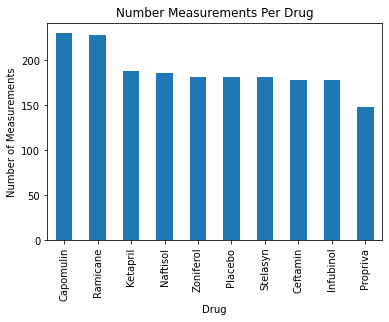

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

pandas_bar = clean_df["Drug Regimen"].value_counts().plot.bar()

pandas_bar.set_xlabel("Drug")
pandas_bar.set_ylabel("Number of Measurements")
pandas_bar.set_title("Number Measurements Per Drug")


Text(0.5, 1.0, 'Number of Measurements by Drug')

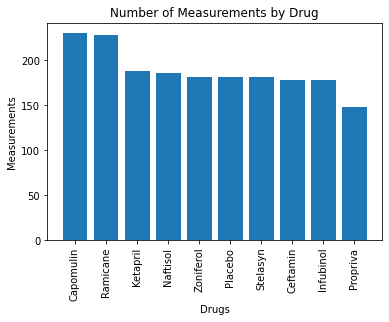

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements = clean_df["Drug Regimen"].value_counts()
drugs = np.arange(len(total_measurements))
plt.bar(drugs, total_measurements)

# Set tick labels
tick_location = [drug for drug in drugs]
plt.xticks(tick_location, total_measurements.index.values, rotation=90)

# Set axis labels
plt.xlabel("Drugs")
plt.ylabel("Measurements")
plt.title("Number of Measurements by Drug")

Text(0, 0.5, '')

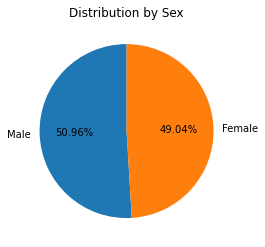

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = clean_df["Sex"].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = pie_data.plot.pie(title="Distribution by Sex", autopct="%1.2f%%", startangle=90)

pie_plot.set_ylabel("")

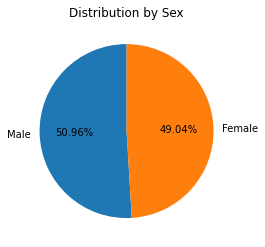

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
pie_data = clean_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(pie_data, labels = pie_data.index.values, autopct="%1.2f%%", startangle=90)

plt.title("Distribution by Sex")
# Display resulting plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# grouped_by_ID = clean_df.groupby("Mouse ID").max()
# grouped_by_ID["Timepoint"]
# type(grouped_by_ID["Timepoint"])
max_tumor = clean_df.groupby(['Mouse ID'])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# new_df = clean_df.merge(grouped_by_ID["Timepoint"], how = "left", on=["Mouse ID", "Timepoint"])
# new_df.head()
new_df = max_tumor.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = new_df.loc[new_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol.append(final_tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
#     tumor_vol.append(final_tumor_volume)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]).count()
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers for {drug}.") 
    print(f"{drug}'s number of potential outliers: {outliers}")

Values below 20.70456164999999 and above 51.83201549 could be outliers for Capomulin.
Capomulin's number of potential outliers: 0
Values below 17.912664470000003 and above 54.30681135 could be outliers for Ramicane.
Ramicane's number of potential outliers: 0
Values below 36.83290494999999 and above 82.74144559000001 could be outliers for Infubinol.
Infubinol's number of potential outliers: 1
Values below 25.355449580000002 and above 87.66645829999999 could be outliers for Ceftamin.
Ceftamin's number of potential outliers: 0


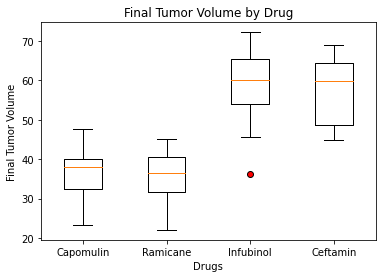

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol, labels = treatments,flierprops=dict(marker='o', markerfacecolor='r', markersize=6))
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drugs")
plt.title("Final Tumor Volume by Drug")
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

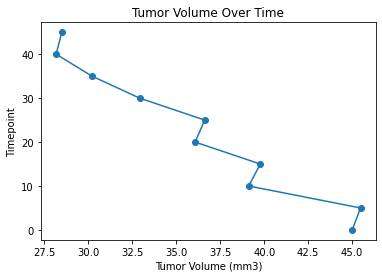

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].head(20)
cap_mouse = clean_df.loc[clean_df["Mouse ID"] == "x401"]
# cap_mouse

plt.plot(cap_mouse["Tumor Volume (mm3)"], cap_mouse["Timepoint"], marker = 'o')

plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Tumor Volume Over Time")

plt.show()

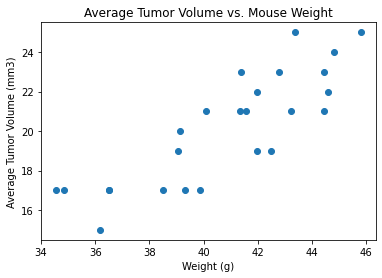

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Get list of avg tumor volumes by mouse

list_of_mice = cap_mice["Mouse ID"].unique()
avg_volume = []

for mouse in list_of_mice:
    avg_per_mouse = cap_mice.loc[cap_mice["Mouse ID"] == mouse]["Tumor Volume (mm3)"].mean()
    avg_volume.append(avg_per_mouse)
avg_volume    

# Get list of mouse weights by mouse

mouse_weight = []

for mouse in list_of_mice:
    weight_per_mouse = cap_mice.loc[cap_mice["Mouse ID"] == mouse]["Weight (g)"].mean()
    mouse_weight.append(weight_per_mouse)
mouse_weight  

plt.scatter(avg_volume, mouse_weight)

# THE GROUPBY WAY TO DO IT: SAME RESULT
# grouped_cap_mice = pd.DataFrame(cap_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()

# grouped_cap_mice = pd.merge(cap_mice, grouped_cap_mice, on='Mouse ID')
# grouped_cap_mice
# final_df = grouped_cap_mice[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()
# final_df

# plt.scatter(final_df["Tumor Volume (mm3)_y"], final_df["Weight (g)"])

# Add labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs. Mouse Weight')

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
round(st.pearsonr(avg_volume, mouse_weight)[0],2)

0.84

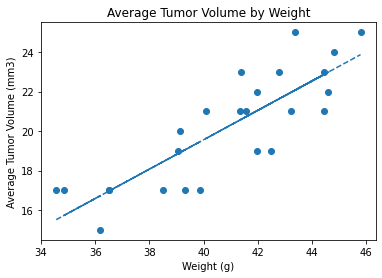

In [20]:
x = np.asarray(avg_volume)
y = np.asarray(mouse_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept
plt.scatter(avg_volume, mouse_weight)
plt.plot(avg_volume,regress_values,"--")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()